In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np

physical_device = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_device[0], True)

# Load the data

In [2]:
df = pd.read_csv('mod_data_training_ys_4.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1460 non-null   object 
 1   river_level_max           1460 non-null   float64
 2   rainfall                  1460 non-null   float64
 3   sunshine_duration         1460 non-null   float64
 4   temperature_avg           1460 non-null   float64
 5   wind_speed_avg            1460 non-null   float64
 6   humidity_avg              1460 non-null   float64
 7   condition                 1460 non-null   float64
 8   river_level_max_tomorrow  1460 non-null   float64
dtypes: float64(8), object(1)
memory usage: 102.9+ KB


In [4]:
df.isna().sum()

date                        1
river_level_max             1
rainfall                    1
sunshine_duration           1
temperature_avg             1
wind_speed_avg              1
humidity_avg                1
condition                   1
river_level_max_tomorrow    1
dtype: int64

In [5]:
df.dropna(inplace=True)
#df

In [6]:
df.describe()

,river_level_max,rainfall,sunshine_duration,temperature_avg,wind_speed_avg,humidity_avg,condition,river_level_max_tomorrow
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,89.458442,5.334110,5.981918,28.751096,2.204795,75.821233,0.160959,89.397163
std,85.980059,15.295454,2.908333,0.895150,0.893111,5.651905,0.564651,86.011929
min,0.000000,0.000000,0.000000,24.900000,0.000000,58.000000,0.000000,0.000000
25%,71.084677,0.100000,3.900000,28.200000,2.000000,72.000000,0.000000,71.000000
50%,89.467711,0.600000,6.600000,28.800000,2.000000,76.000000,0.000000,89.467711
75%,92.000000,1.925000,8.300000,29.400000,3.000000,80.000000,0.000000,92.000000
max,1292.000000,155.500000,11.600000,31.400000,7.000000,94.000000,3.000000,1292.000000


In [7]:
target_column = 'river_level_max'
feature_columns = ['rainfall', 'sunshine_duration',
                   'temperature_avg', 'wind_speed_avg',	'humidity_avg']

# Normalisasi

df.loc[:, feature_columns] = ((df[feature_columns] - df[feature_columns].min())/ 
                              (df[feature_columns].max() - df[feature_columns].min()))

df[feature_columns].describe()

# Train & test split

In [8]:
# Shuffle
df = df.sample(frac=1)

# Calculate test set size
test_set_size = int(len(df) * 0.01)

# Split the data
testing_df = df[:test_set_size]
training_df = df[test_set_size:]

print("Number of training data = ", len(training_df))
print("Number of testing data = ", len(testing_df))

Number of training data =  1446
Number of testing data =  14


In [9]:
train_features = np.asarray(training_df[feature_columns])
test_features = np.asarray(testing_df[feature_columns])

train_label = np.asarray(training_df[target_column])
test_label = np.asarray(testing_df[target_column])

# Simple DNN model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [11]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=["mae"])

# Training the model

In [12]:
batch_size = 20
history = model.fit(train_features, train_label, epochs=300, validation_split=0.1, batch_size=batch_size)

Epoch 1/300
66/66 [==============================] - 2s 16ms/step - loss: 73.3847 - mae: 73.8846 - val_loss: 47.0125 - val_mae: 47.5120
Epoch 2/300
66/66 [==============================] - 0s 5ms/step - loss: 43.2842 - mae: 43.7788 - val_loss: 34.8957 - val_mae: 35.3872
Epoch 3/300
66/66 [==============================] - 0s 5ms/step - loss: 40.2715 - mae: 40.7665 - val_loss: 34.7466 - val_mae: 35.2393
Epoch 4/300
66/66 [==============================] - 0s 6ms/step - loss: 38.3000 - mae: 38.7935 - val_loss: 34.6394 - val_mae: 35.1295
Epoch 5/300
66/66 [==============================] - 0s 5ms/step - loss: 40.0603 - mae: 40.5522 - val_loss: 34.5383 - val_mae: 35.0282
Epoch 6/300
66/66 [==============================] - 0s 5ms/step - loss: 39.4247 - mae: 39.9186 - val_loss: 34.6218 - val_mae: 35.1203
Epoch 7/300
66/66 [==============================] - 0s 6ms/step - loss: 39.1441 - mae: 39.6385 - val_loss: 34.3370 - val_mae: 34.8308
Epoch 8/300
66/66 [==============================] - 0

66/66 [==============================] - 0s 6ms/step - loss: 38.7528 - mae: 39.2446 - val_loss: 33.7542 - val_mae: 34.2453
Epoch 62/300
66/66 [==============================] - 0s 6ms/step - loss: 36.4640 - mae: 36.9549 - val_loss: 33.9409 - val_mae: 34.4352
Epoch 63/300
66/66 [==============================] - 0s 6ms/step - loss: 35.5879 - mae: 36.0783 - val_loss: 33.5693 - val_mae: 34.0581
Epoch 64/300
66/66 [==============================] - 0s 6ms/step - loss: 40.0626 - mae: 40.5558 - val_loss: 33.3482 - val_mae: 33.8232
Epoch 65/300
66/66 [==============================] - 0s 5ms/step - loss: 35.1603 - mae: 35.6482 - val_loss: 33.3233 - val_mae: 33.8010
Epoch 66/300
66/66 [==============================] - 0s 5ms/step - loss: 40.0788 - mae: 40.5719 - val_loss: 33.3242 - val_mae: 33.8080
Epoch 67/300
66/66 [==============================] - 0s 6ms/step - loss: 36.2446 - mae: 36.7306 - val_loss: 33.4646 - val_mae: 33.9457
Epoch 68/300
66/66 [==============================] - 0s 6ms/

66/66 [==============================] - 0s 5ms/step - loss: 37.8654 - mae: 38.3549 - val_loss: 33.2120 - val_mae: 33.6903
Epoch 122/300
66/66 [==============================] - 0s 6ms/step - loss: 36.8376 - mae: 37.3284 - val_loss: 33.1260 - val_mae: 33.6017
Epoch 123/300
66/66 [==============================] - 0s 6ms/step - loss: 34.7206 - mae: 35.2119 - val_loss: 33.4775 - val_mae: 33.9697
Epoch 124/300
66/66 [==============================] - 0s 5ms/step - loss: 36.2080 - mae: 36.7023 - val_loss: 33.1057 - val_mae: 33.5794
Epoch 125/300
66/66 [==============================] - 0s 5ms/step - loss: 36.0438 - mae: 36.5363 - val_loss: 33.0933 - val_mae: 33.5641
Epoch 126/300
66/66 [==============================] - 0s 5ms/step - loss: 39.5014 - mae: 39.9925 - val_loss: 33.1015 - val_mae: 33.5662
Epoch 127/300
66/66 [==============================] - 0s 5ms/step - loss: 38.5671 - mae: 39.0566 - val_loss: 33.0855 - val_mae: 33.5567
Epoch 128/300
66/66 [==============================] - 

Epoch 181/300
66/66 [==============================] - 0s 5ms/step - loss: 38.2728 - mae: 38.7652 - val_loss: 32.9273 - val_mae: 33.3909
Epoch 182/300
66/66 [==============================] - 0s 5ms/step - loss: 34.9332 - mae: 35.4214 - val_loss: 32.9913 - val_mae: 33.4697
Epoch 183/300
66/66 [==============================] - 0s 6ms/step - loss: 34.6878 - mae: 35.1788 - val_loss: 33.3659 - val_mae: 33.8456
Epoch 184/300
66/66 [==============================] - 0s 6ms/step - loss: 34.2036 - mae: 34.6921 - val_loss: 32.9179 - val_mae: 33.3824
Epoch 185/300
66/66 [==============================] - 0s 5ms/step - loss: 37.7545 - mae: 38.2450 - val_loss: 32.9371 - val_mae: 33.4033
Epoch 186/300
66/66 [==============================] - 0s 5ms/step - loss: 37.5185 - mae: 38.0059 - val_loss: 32.9439 - val_mae: 33.4032
Epoch 187/300
66/66 [==============================] - 0s 6ms/step - loss: 36.8358 - mae: 37.3263 - val_loss: 33.1331 - val_mae: 33.6206
Epoch 188/300
66/66 [====================

66/66 [==============================] - 0s 5ms/step - loss: 36.5860 - mae: 37.0769 - val_loss: 33.0418 - val_mae: 33.5320
Epoch 241/300
66/66 [==============================] - 0s 5ms/step - loss: 35.8984 - mae: 36.3918 - val_loss: 33.0589 - val_mae: 33.5484
Epoch 242/300
66/66 [==============================] - 0s 5ms/step - loss: 34.8273 - mae: 35.3185 - val_loss: 32.8493 - val_mae: 33.3152
Epoch 243/300
66/66 [==============================] - 0s 5ms/step - loss: 35.7215 - mae: 36.2065 - val_loss: 33.5812 - val_mae: 34.0731
Epoch 244/300
66/66 [==============================] - 0s 5ms/step - loss: 37.0217 - mae: 37.5107 - val_loss: 33.0280 - val_mae: 33.5162
Epoch 245/300
66/66 [==============================] - 0s 5ms/step - loss: 38.0093 - mae: 38.5008 - val_loss: 32.8723 - val_mae: 33.3229
Epoch 246/300
66/66 [==============================] - 0s 5ms/step - loss: 34.3719 - mae: 34.8597 - val_loss: 33.1258 - val_mae: 33.6161
Epoch 247/300
66/66 [==============================] - 

Epoch 300/300
66/66 [==============================] - 0s 6ms/step - loss: 36.8389 - mae: 37.3281 - val_loss: 32.9428 - val_mae: 33.4295


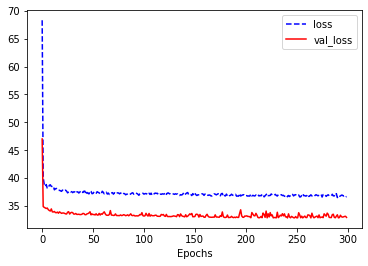

In [13]:
import matplotlib.pyplot as plt

mae = history.history['mae']
loss = history.history['loss']
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']
epochs = range(len(mae))

# Plot loss & validation loss
plt.figure()
plt.plot(epochs, loss, '--b')
plt.plot(epochs, val_loss, '-r')
plt.xlabel("Epochs")
plt.legend(["loss", "val_loss"])
plt.show()

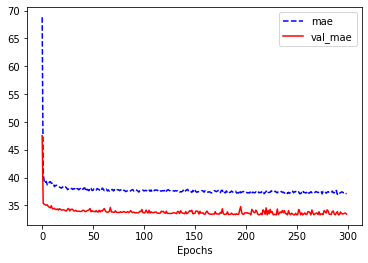

In [14]:
# Plot mae & validation mae
plt.figure()
plt.plot(epochs, mae, '--b')
plt.plot(epochs, val_mae, '-r')
plt.xlabel("Epochs")
plt.legend(["mae", "val_mae"])
plt.show()

# Testing

In [15]:
prediction = model.predict(test_features[0:2])

In [16]:
prediction

array([[88.29331],
       [91.16641]], dtype=float32)

In [17]:
mse = tf.keras.metrics.mean_squared_error(test_label[0:2], prediction).numpy()
mae = tf.keras.metrics.mean_absolute_error(test_label[0:2], prediction).numpy()


print('MSE = ', mse)
print('MAE = ', mae)

MSE =  [95.11947 90.69411]
MAE =  [9.5 9.5]


In [18]:
prediction = model.predict(train_features)

In [19]:
index = range(len(prediction))

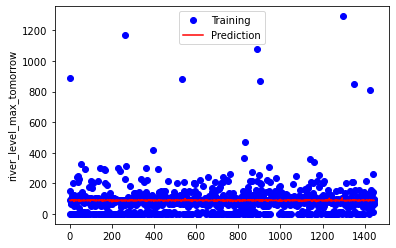

In [20]:
plt.figure()
plt.plot(index, train_label, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Training", "Prediction"])
plt.ylabel("river_level_max_tomorrow")
plt.show()

In [21]:
prediction = model.predict(test_features)
index = range(len(prediction))

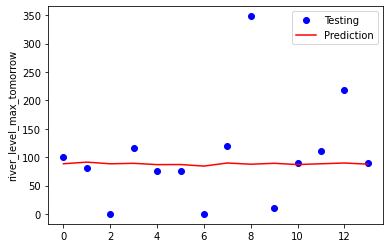

In [22]:
plt.figure()
plt.plot(index, test_label, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Testing", "Prediction"])
plt.ylabel("river_level_max_tomorrow")
plt.show()

# Generate a saved model

In [23]:
export_dir = 'save_final_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: save_final_model/assets


In [24]:
#model.save("final_model.h5")

# Convert the saved model to TFLite

In [25]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [26]:
import pathlib
tflite_model_file = pathlib.Path('final_model.tflite')
tflite_model_file.write_bytes(tflite_model)

13056